In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **Basic Logistic Regression**

In [ ]:
x = 1.0
y = 0
x, y

(1.0, 0)

In [ ]:
w = 0.5
b = 0.1
w, b

(0.5, 0.1)

In [ ]:
lr = 0.1

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(0.5)

np.float64(0.6224593312018546)

In [ ]:
# predict
def predict(x, w, b):
    z = w*x + b
    y_hat = sigmoid(z)
    return z, y_hat

z, y_hat = predict(x, w, b)
z, y_hat

(0.6, np.float64(0.6456563062257954))

In [ ]:
# Loss
def compute_loss(y_hat, y):
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

loss = compute_loss(y_hat, y)
loss

np.float64(1.0374879504858854)

In [ ]:
# Compute gradient
def compute_gradient(y_hat, y, x):
    error = y_hat - y
    grad_w = error * x
    grad_b = error
    return grad_w, grad_b

grad_w, grad_b = compute_gradient(y_hat, y, x)
grad_w, grad_b

(np.float64(0.6456563062257954), np.float64(0.6456563062257954))

In [ ]:
# Update weights
def update_weight(w, b, lr, grad_w, grad_b):
    w = w - lr * grad_w
    b = b - lr * grad_b
    return w, b

w, b = update_weight(w, b, lr, grad_w, grad_b)
w, b

(np.float64(0.43543436937742047), np.float64(0.03543436937742046))

**Prediction**

In [ ]:
x_test = 2.0
z, y_hat = predict(x_test, w, b)
z, y_hat

(np.float64(0.9063031081322614), np.float64(0.7122430690262757))

# **Vectorization**

## 1 sample

In [18]:
# data
x = np.array([[1.0], [1.0]]) # with bias
y = 0
x, y

(array([[1.],
        [1.]]),
 0)

In [19]:
# Init
theta = np.array([[0.5], [0.1]])
lr = 0.1
theta, lr

(array([[0.5],
        [0.1]]),
 0.1)

In [21]:
# predict z, y_hat
def predict(x, theta):
    z = theta.T.dot(x)
    y_hat = sigmoid(z)
    return z, y_hat

z, y_hat = predict(x, theta)
z, y_hat

(array([[0.6]]), array([[0.64565631]]))

In [22]:
# compute loss
def compute_loss(y_hat, y):
    loss = -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

loss = compute_loss(y_hat, y)
loss

array([[1.03748795]])

In [23]:
# compute gradient (cho 1 sample CỘT)
def compute_gradient(z, y, y_hat):
    error = y_hat - y
    grad = x * error
    return grad

grad = compute_gradient(z, y, y_hat)
grad

array([[0.64565631],
       [0.64565631]])

In [24]:
# update weights
def update_weight(theta, lr, grad):
    return theta - lr * grad

theta = update_weight(theta, lr, grad)
theta

array([[0.43543437],
       [0.03543437]])

In [26]:
x_test = np.array([[2.0], [1.0]]) # with bias
z, y_hat = predict(x_test, theta)
z, y_hat

(array([[0.90630311]]), array([[0.71224307]]))

## m samples

In [29]:
# data
X = np.array([
    [2.0, 1.0],
    [2.5, 1.0]
]) # with bias

y = np.array([[0.0], [1.0] ])

m = X.shape[0]
X, y, m

(array([[2. , 1. ],
        [2.5, 1. ]]),
 array([[0.],
        [1.]]),
 2)

In [30]:
# Init
theta = np.array([[0.5], [0.1]])
lr = 0.1
theta, lr

(array([[0.5],
        [0.1]]),
 0.1)

In [33]:
# predict z, y_hat
def predict(x, theta):
    z = x.dot(theta)
    y_hat = sigmoid(z)
    return z, y_hat

z, y_hat = predict(X, theta)
z, y_hat

(array([[1.1 ],
        [1.35]]),
 array([[0.75026011],
        [0.79412963]]))

In [34]:
# compute loss
def compute_loss(y_hat, y, m):
    cost = y.T.dot(np.log(y_hat)) + (1 - y).T.dot(np.log(1 - y_hat))
    cost = -(1/m) * cost
    return cost

loss = compute_loss(y_hat, y, m)
loss

array([[0.80892195]])

In [38]:
# compute gradient
def compute_gradient(X, y, y_hat, m):
    error = y_hat - y
    grad = (1/m) * X.T.dot(error)
    return grad

grad = compute_gradient(X, y, y_hat, m)
grad

array([[0.49292214],
       [0.27219487]])

In [39]:
# update weights
def update_weight(theta, lr, grad):
    return theta - lr * grad

theta = update_weight(theta, lr, grad)
theta

array([[0.45070779],
       [0.07278051]])

## **Classification**

In [41]:
import pandas as pd

In [40]:
!gdown 1SQHTP54rKXYUw-xym1d9PI3v9M13wHQE

Downloading...
From: https://drive.google.com/uc?id=1SQHTP54rKXYUw-xym1d9PI3v9M13wHQE
To: /content/data.csv
100% 3.89k/3.89k [00:00<00:00, 15.9MB/s]


In [42]:
data = pd.read_csv("./data.csv")
data.head()

,Width,Length,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [91]:
X = data[['Width', 'Length']]
y = data['Result'].values.reshape(-1, 1)

In [86]:
n_samples = X.shape[0]
n_samples

100

In [93]:
# vector [1, X]
X = np.hstack([np.ones((n_samples, 1)), X])
X.shape

(100, 3)

In [117]:
n_features = X.shape[-1]
theta = np.random.rand(n_features, 1)
theta

array([[0.36912193],
       [0.35232304],
       [0.2362986 ]])

In [114]:
def predict(X, theta):
  z = X.dot(theta)
  y_hat = sigmoid(z)
  return z, y_hat

def compute_loss(y_hat, y, epsilon=1e-9):
    m = y.shape[0]
    cost = y.T.dot(np.log(y_hat + epsilon)) + (1 - y).T.dot(np.log(1 - y_hat + epsilon))
    cost = -(1/m)*cost
    return cost

def compute_gradient(X, y, y_hat):
    m = X.shape[0]
    error = y_hat - y
    grad = (1/m) * X.T.dot(error)
    return grad

def update_weight(theta, lr, gradient):
  new_theta = theta - lr*gradient
  return new_theta

In [118]:
# param
n_epochs = 500
lr = 0.001

losses = []
for epoch in range(n_epochs):
  # predict y_hat
  z, y_hat = predict(X, theta)

  # compute loss
  loss = compute_loss(y_hat, y)
  losses.append(loss.item())

  # compute gradient
  gradient = compute_gradient(X, y, y_hat)

  # update weights
  theta = update_weight(theta, lr, gradient)

theta

array([[ 0.32832869],
       [ 0.00815424],
       [-0.00209619]])

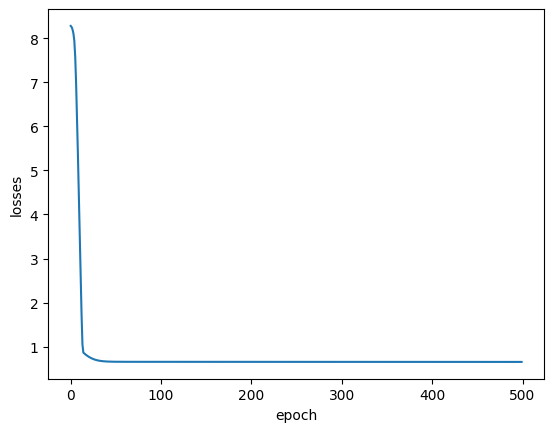

In [127]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.savefig('model.png', dpi=300)
plt.show()

In [124]:
Z, Y_preds = predict(X, theta)

In [125]:
thresholds = [0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
accs = []
for threshold in thresholds:
  Y_pred_ths = []
  for y_pred in Y_preds:
    if y_pred >= threshold:
      Y_pred_ths.append(1)
    else:
      Y_pred_ths.append(0)

  Y_pred_ths = np.array(Y_pred_ths)
  acc = sum(Y == Y_pred_ths)/len(Y)
  accs.append(acc)
accs

[0.6, 0.6, 0.6, 0.62, 0.72, 0.54, 0.4, 0.4]